<div id="container" style="position:relative;">
<div style="float:left"><h1> Stats and Politics 1 </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

##  Prepared by : Eduardo Aparecido Sereguin Cabral de Melo

## Summary
_______________________________________________________________________________________________________________________________

### 0. Preliminary step: importing libraries 

### 1. Preparing the data

    1.1. Loading the files

    1.2. Checking the size of the Dataframes

    1.3. Calculating the number of rows and columns

### 2. Understanding the data

    2.1. Selecting columns for further analysis

    2.2. Classifying values as absolute or relative

    2.3. Classifying columns as numerical or categorical

    2.4. Visualizing the data 

### 3. Cleaning the data

    3.1. Identifying columns with duplicate information

    3.2. Droping duplicate columns

    3.3. Helpful cleanup steps

    3.4. Identifying columns with missing values

    3.5. Comparing Mean, median and data distribution for missing data columns

    3.6. Correcting columns and rows with missing data

### 4. Augmenting the data

    4.1. Creating new columns with relative count per county



### 0. Preliminary step: importing libraries 

Importing the libraries to be used to for the queries:

In [1]:
import numpy as np
import pandas as pd
import glob
import random

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Preparing the data

##### 1.1. Loading the files

1.1.1. Loading the **data.csv** file and taking a look at it with .head()

In [2]:
data_df = pd.read_csv('data/data.csv')
data_df.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN


1.1.1. Loading the **votes.csv** file and taking a look at it with .head()

In [3]:
votes_df = pd.read_csv('data/votes.csv')
votes_df.head()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,5043
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,5087
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,13159
3,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,8037
4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,13091


##### 1.2. Checking the size of the Dataframes

1.2.1. Checking the size of data_df

In [4]:
print("The total size of data_df dataframe is: " +str(data_df.size)+" cells" "\n" +
      "Including cells with missing values")

The total size of data_df dataframe is: 169614 cells
Including cells with missing values


1.2.2. Checking the size of vote_df

In [5]:
print("The total size of data_df dataframe is: " +str(votes_df.size)+" cells" "\n" +
      "Including cells with missing values")

The total size of data_df dataframe is: 21987 cells
Including cells with missing values


##### 1.3. Calculating the number of rows and columns

1.3.1. Count of rows and columns for data_df:

**Coding:**
1. wrapped each command row with a print statement to show a explanation and not only plain numbers.
2. Transformed results into strings to allow concatenation with "+".

**Results:**

- Printed out the number of rows and columns within the data_csv file, named as **data_df**

In [6]:
print("data_df has:")
print("rows: ",str(data_df.shape[0]))
print("columns: ",str(data_df.shape[1]))

data_df has:
rows:  3141
columns:  54


1.3.2. Count of rows and columns for votes_df:

**Coding:**
1. wrapped each command row with a print statement to show a explanation and not only plain numbers.
2. Transformed results into strings to allow concatenation with "+".

**Results:**

- Printed out the number of rows and columns within the data_csv file, named as **votes_df**

In [7]:
print("votes_df has:")
print("rows: ",str(votes_df.shape[0]))
print("columns: ",str(votes_df.shape[1]))

votes_df has:
rows:  3141
columns:  7


### 2. Understanding the data

#####     2.1. Selecting columns for further analysis

Selected 5 columns whithin the **data_df**:

1. 'Native American Population'
2. 'Total Population'
3. 'median_age'
4. 'Adult.obesity'
5. 'Homicide.rate'

**Following the selction of the columns, the 10 first were selected to help classify the values as absolute or relative**

**Coding:**

1. Within the **data_df** dataset, we sliced the five pre-selected columns.
2. Following, we used **.head()** to select the first 10 rows (n=10).

In [8]:
# Subsetting the selected columns to explains the data (points a, b and c from Step 9)

data_df[['Native American Population','Total Population','median_age', 'Adult.obesity', 'Homicide.rate']].head(n=10)

,Native American Population,Total Population,median_age,Adult.obesity,Homicide.rate
0,0.15,18604,36.8,0.323,NaN
1,1.25,15597,38.5,0.328,NaN
2,0.40,13744,38.1,0.298,NaN
3,0.25,51405,33.4,0.132,NaN
4,0.15,20745,37.7,0.358,8.11
5,1.00,167281,31.6,0.235,3.22
6,0.10,114913,25.8,0.267,5.03
7,0.50,9836,36.7,0.251,NaN
8,0.35,12878,35.9,0.255,NaN
9,0.20,110584,33.2,0.314,4.94


#####     2.2. Classifying values as absolute or relative

#### All data is organized per FIPS (Federal Information Processing Standards)

1. 'Native American Population'
    - a.  Percentage of Native American Population
    - b.  Relative value  as it is a percentage(ratio)
2.  'Total Population'
    - a.  Total population in that county/FIPS
    - b.  Absolute as they refer to the total population
3.  'median_age'
    - a.  Median age of the population
    - b.  Absolute as they refer to the median age of the population
4.  'Adult.obesity'
    - a.  Rate of Adult obesity
    - b.  Ratio, relative information related to the number of obese people compared to the total population
5.  'Homicide.rate'
    - a.  Rate of homicides
    - b.  Ratio, relative information related to the number of Homicides compared to the total population




#####     2.3. Classifying columns as numerical or categorical

#### All data is organized per FIPS (Federal Information Processing Standards)
1. 'Native American Population' : Numeric
2. 'Total Population'  : Numeric
3. 'median_age' : Numeric
4. 'Adult.obesity' : Numeric
5. 'Homicide.rate'  : Numeric

#####     2.4. Visualizing the data 

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


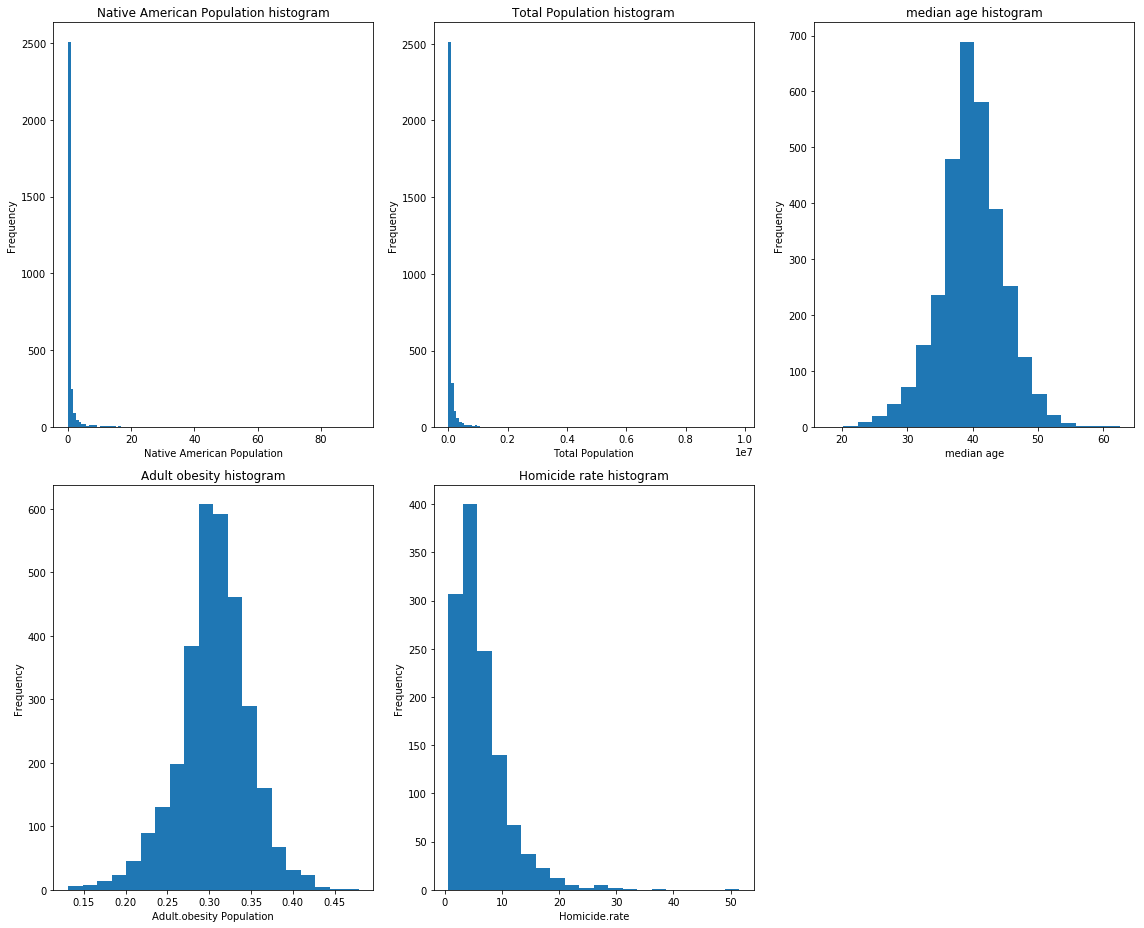

In [9]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(16,13))

gridspec.GridSpec(2,3)

plt.subplot2grid((2,3), (0,0))
plt.hist(data_df['Native American Population'], bins=110)
plt.xlabel('Native American Population')
plt.ylabel('Frequency')
plt.title('Native American Population histogram')

plt.subplot2grid((2,3), (0,1))
plt.hist(data_df['Total Population'], bins=110)
plt.xlabel('Total Population')
plt.ylabel('Frequency')
plt.title('Total Population histogram')

plt.subplot2grid((2,3), (0,2))
plt.hist(data_df['median_age'], bins=20)
plt.xlabel('median age')
plt.ylabel('Frequency')
plt.title('median age histogram')

plt.subplot2grid((2,3), (1,0))
plt.hist(data_df['Adult.obesity'], bins=20)
plt.xlabel('Adult.obesity Population')
plt.ylabel('Frequency')
plt.title('Adult obesity histogram')

plt.subplot2grid((2,3), (1,1))
plt.hist(data_df['Homicide.rate'], bins=20)
plt.xlabel('Homicide.rate')
plt.ylabel('Frequency')
plt.title('Homicide rate histogram')


plt.tight_layout()
plt.show()

### 3. Cleaning the data

#### 3.1. Identifying columns with duplicate information

First of all we did a quick check to see whether there were columns with the exact same name:

1. Comparing if the number of columns is the same as distinct column titles (if yes, it means columns are not replicate, otherwise, there is replication)

**Coding:**

1. Set up an IF statement, which counted the number of columns and the number of distinct column names.
2. In case of **True**, it would indicate there are replicated column names and most probably replicated values.
3. in case of **False**, it would indicate to use other methods to look for duplicated values.

**Results:**

- Indicated that column names are different, therefore, further analysis is required to determine the existence of duplicated data.

In [10]:
if len(data_df.columns) != len(set(data_df.columns)):
    print("You have replicated columns, clear your data!")
else:
     print("You don't have replicated columns, better check rows also!")

You don't have replicated columns, better check rows also!


#### 3.1. Identifying columns with duplicate information (continuing)

Since the first automated attempt failed. we moved to looking at the data manually by checking the column titles and slices sets of columns for further analysis.

**Coding:** 
1. _Used .loc_ to select a specific slice of columns, related to education

**Results:**
- The set of columns below portraits the level of education. Each column provides a distinct piece of information and, therefore,  none of these columns should be removed.

In [11]:
data_df.loc[0:13,'Less Than High School Diploma': 'School Enrollment' ]

,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment
0,19.4,80.6,19.4,5.7,78.50
1,24.2,75.8,13.4,4.1,76.40
2,21.7,78.3,13.3,5.6,70.20
3,12.8,87.2,45.9,11.7,64.10
4,23.1,76.9,13.8,4.8,61.50
5,37.7,62.3,12.2,4.0,77.95
6,15.7,84.3,41.2,19.3,83.00
7,16.4,83.6,17.8,4.5,73.90
8,19.5,80.5,18.3,7.2,80.45
9,21.2,78.8,18.3,6.7,76.25


After education, we looked into the types of population, two sets of columns were selected.

**Coding:** _Used .loc_ to select a specific slice of columns, related to population

**Results:**

- The next two slices of the data_df dataset are clear duplicates. 
- Each column in the first slice is being represented a second time in the second slice. 
- The only difference is that on the second one, a new column was added, "white_asian", being the sum of white and asian populations per county(FIPS). 
- An irrelevant data as none of the other possible combinations were created.
- Therefore, all columns on the second slice will be dropped later.

In [12]:
data_df.loc[0:13,'White (Not Latino) Population': 'Latino Population']

,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population
0,67.90,27.95,0.15,0.55,0.85,2.65
1,92.00,0.25,1.25,0.30,1.50,4.70
2,72.70,22.20,0.40,0.10,1.05,3.55
3,68.40,0.30,0.25,1.15,1.10,28.90
4,66.15,29.80,0.15,0.45,0.65,2.80
5,15.20,3.10,1.00,1.60,0.85,78.25
6,58.90,25.95,0.10,3.70,1.75,9.55
7,78.50,0.15,0.50,0.10,0.50,20.25
8,61.10,0.35,0.35,0.30,1.35,36.45
9,74.35,17.55,0.20,0.80,1.70,5.50


In [13]:
data_df.loc[0:13,'White': 'White_Asian']

,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian
0,67.90,27.95,2.65,0.55,0.15,0.85,68.45
1,92.00,0.25,4.70,0.30,1.25,1.50,92.30
2,72.70,22.20,3.55,0.10,0.40,1.05,72.80
3,68.40,0.30,28.90,1.15,0.25,1.10,69.55
4,66.15,29.80,2.80,0.45,0.15,0.65,66.60
5,15.20,3.10,78.25,1.60,1.00,0.85,16.80
6,58.90,25.95,9.55,3.70,0.10,1.75,62.60
7,78.50,0.15,20.25,0.10,0.50,0.50,78.60
8,61.10,0.35,36.45,0.30,0.35,1.35,61.40
9,74.35,17.55,5.50,0.80,0.20,1.70,75.15


**Conclusions and decisions:**

##### Duplicated columns
1. White (Not Latino) Population	= White	
2. African American Population      = Black
3. Native American Population       = Amerindian
4. Asian American Population        = Asian
5. Other Race or Races	            = Other
6. Latino Population                = Hispanic		
7. White (Not Latino) Population + Asian American Population  = White_Asian (Create calculation to show)

##### Other columns that can also be supressed
1. ST
    - The previous column in the table, **"State"**, provides exactly the same information, therefore, **ST** is being removedfrom the dataframe.

2. County
    - County provides the name of the referred county, the word "county" itself and the state's name, most of those, unnecessary. Specially because every county has its own unique FIPS, therefore even the column county is not required for a proper identification and analysis. Finally I decided to drop this column based on these arguments. More information on each county and its respective code can be found at: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697

As the next command, we'll be dropping the above mentioned columns.




#####     3.2. Droping duplicate columns

The new dataframe received the name **Data_rev1**

In [14]:
Data_rev1 = data_df.drop(columns=['ST', 'County','White', 'Black','Amerindian','Asian','Other','Hispanic', 'White_Asian'])

##### Column name standardization
Column names are not standardized, the main problems found were:

1. Dots, ".", doing the function of spaces

2. Underscores, "_", also playing the role of spaces

3. One column title not starting with a capital letter (median_age).

First of all, let's create a new list that contains all the columns' names

**Coding:** 
1. Used __.columns__ and __print()__ to create and print the new list, respectivelly.

**Results:**
- A new list, only with the column names was created (**data_col**)

In [15]:
data_col = Data_rev1.columns
print(data_col)

Index(['State', 'Fips', 'Precincts', 'Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.m

#####     3.3. Helpful cleanup steps

##### Removing dots:

Columns are not standardized, some column names are separated by dots, let's correct that by replacing the "." with spaces " "

**Coding:** 
1. To make it easier an ensure all dots are replaced, we used a For loops. 
2. First we created a new empty list to be filled with the corrected column names.
3. Then we used a **.replace()** statement to ensure all '.' would be replaced.
4. Finally, all updated names were added to the **new_list**.

**Results:**
- A **new_list** was created, with the updated column names.

In [16]:
new_list=[]
for i in range(len(Data_rev1.columns)):
    data_col= Data_rev1.columns
    intermediary = data_col[i].replace('.', ' ')
    new = str(intermediary)    
    new_list.append(new)
print(new_list)


['State', 'Fips', 'Precincts', 'Votes', 'Less Than High School Diploma', 'At Least High School Diploma', "At Least Bachelors's Degree", 'Graduate Degree', 'School Enrollment', 'Median Earnings 2010', 'White (Not Latino) Population', 'African American Population', 'Native American Population', 'Asian American Population', 'Other Race or Races', 'Latino Population', 'Children Under 6 Living in Poverty', 'Adults 65 and Older Living in Poverty', 'Total Population', 'Preschool Enrollment Ratio enrolled ages 3 and 4', 'Poverty Rate below federal poverty threshold', 'Gini Coefficient', 'Child Poverty living in families below the poverty line', 'Management professional and related occupations', 'Service occupations', 'Sales and office occupations', 'Farming fishing and forestry occupations', 'Construction extraction maintenance and repair occupations', 'Production transportation and material moving occupations', 'SIRE_homogeneity', 'median_age', 'Low birthweight', 'Teen births', 'Children in s

##### Removing underscores:

one of the columns, "median_age", has an underscore separating words, but there may be others, to correct it, we will use the same process as done for the dots.

**Coding:** 
1. To make it easier an ensure all dots are replaced, we used a For loops. 
2. First we created a new empty list to be filled with the corrected column names.
3. Then we used a **.replace()** statement to ensure all '.' would be replaced.
4. Finally, all updated names were added to the **new_list2**.

**Results:**
- A **new_list2** was created, with the updated column names.

In [17]:
new_list2=[]
for i in range(len(new_list)):
    intermediary2 = new_list[i].replace('_', ' ')
    new2 = str(intermediary2)    
    new_list2.append(new2)
print(new_list2)

['State', 'Fips', 'Precincts', 'Votes', 'Less Than High School Diploma', 'At Least High School Diploma', "At Least Bachelors's Degree", 'Graduate Degree', 'School Enrollment', 'Median Earnings 2010', 'White (Not Latino) Population', 'African American Population', 'Native American Population', 'Asian American Population', 'Other Race or Races', 'Latino Population', 'Children Under 6 Living in Poverty', 'Adults 65 and Older Living in Poverty', 'Total Population', 'Preschool Enrollment Ratio enrolled ages 3 and 4', 'Poverty Rate below federal poverty threshold', 'Gini Coefficient', 'Child Poverty living in families below the poverty line', 'Management professional and related occupations', 'Service occupations', 'Sales and office occupations', 'Farming fishing and forestry occupations', 'Construction extraction maintenance and repair occupations', 'Production transportation and material moving occupations', 'SIRE homogeneity', 'median age', 'Low birthweight', 'Teen births', 'Children in s

##### Renaming median age as Median age

one of the columns, "median age", does not start with a capital letter, for proper visualization, ensuring quality, we will correct it.

**Coding:** 

1. We selected the column median age by calling its index number, then, we addressed it a new name.

**Results:**

- All column names for the **Data_rev1**(Previous data_df) are now updated.

In [18]:
new_list2[-15] = 'Median age'

##### Including the changes in the table

Now that all changes were made, let's update the dataset (data_df) with the newly created column names.

**Coding:** 
1. To do it, we simply informed that the data_df.columns should follow the strings in new_list2, by using =

In [19]:
Data_rev1.columns= new_list2

Calling the updated dataset to check the column names with  __.columns__ for checking purposes

In [20]:
Data_rev1.columns

Index(['State', 'Fips', 'Precincts', 'Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool Enrollment Ratio enrolled ages 3 and 4',
       'Poverty Rate below federal poverty threshold', 'Gini Coefficient',
       'Child Poverty living in families below the poverty line',
       'Management professional and related occupations',
       'Service occupations', 'Sales and office occupations',
       'Farming fishing and forestry occupations',
       'Construction extraction maintenance and repair occupations',
       'Production transportation and m

#####     3.4. Identifying columns with missing values

First step was determining whether or not we had missing values in our dataset, starting with **data_df**

**Coding:** 
1. we used the .isna().sum() to count cumulatively the number of cells per column lacking data.

In [21]:
missing_data= print(Data_rev1.isna().sum())

State                                                            0
Fips                                                             0
Precincts                                                       32
Votes                                                           32
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                       0
Asian American Population                                        0
Other Race or Races                                           

creating a sub-list only with the titles of the columns containing missing values in **Data_rev1** (previous data_df). The list will be used further ahead.

In [22]:
NaN_columns = []
print("Columns with missing values:")
print()
for i in list(Data_rev1.columns):
    miss_val1 = Data_rev1[i].count()  
    if miss_val1 <3141:
        miss_val2=str(i)
        NaN_columns.append(miss_val2)
    
print(*NaN_columns, sep = "\n")
print()
print("Columns with missing value:"+str(len(NaN_columns)))



Columns with missing values:

Precincts
Votes
Preschool Enrollment Ratio enrolled ages 3 and 4
Child Poverty living in families below the poverty line
Low birthweight
Teen births
Children in single parent households
Adult smoking
Adult obesity
Diabetes
Sexually transmitted infections
HIV prevalence rate
Uninsured
Unemployment
Violent crime
Homicide rate
Injury deaths
Infant mortality

Columns with missing value:18


After that, we looked for missing values in the **votes_df**

**Coding:**  
1. Same as before, we used the .isna().sum() to count cumulatively the number of cells per column lacking data.

**Results:**

- All columns, besides FIPS have missing values. 

- The numbers indicate how many cells have missing values per column.

In [23]:
missing_votes= print(votes_df.isna().sum())

Democrats 08 (Votes)      31
Democrats 12 (Votes)      31
Republicans 08 (Votes)    31
Republicans 12 (Votes)    31
votes16_trumpd            32
votes16_clintonh          32
Fips                       0
dtype: int64


##### 3.5. Comparing Mean, median and data distribution for missing data columns

##### 3.5.1. calculations for the Data_rev1(originally data_df)*

*votes_df calculations are shown on 3.5.2

First, we looked at some descriptive statistics, such as Mean and Median (50%).

The objective is to determine whether or not data distribution is homogeneous.

**Coding:**

1. We ran the **.describe()** to visualize the descriptive statistics for the missing value columns

**Results:** 
- According to the results, **Precincts, Votes, Sexually transmitted infections, HIV prevalence rate and Violent crime** have considerably different mean and median.

- For this reason, we will check the histograms to verify the distribution of the data.

In [24]:
Data_rev1[list(NaN_columns)].describe()

,Precincts,Votes,Preschool Enrollment Ratio enrolled ages 3 and 4,Child Poverty living in families below the poverty line,Low birthweight,Teen births,Children in single parent households,Adult smoking,Adult obesity,Diabetes,Sexually transmitted infections,HIV prevalence rate,Uninsured,Unemployment,Violent crime,Homicide rate,Injury deaths,Infant mortality
count,3109.000000,3.109000e+03,3133.000000,3140.000000,2914.000000,3042.000000,3134.000000,2706.000000,3136.000000,3136.000000,2952.000000,2320.000000,3135.000000,3135.000000,2953.000000,1251.000000,2844.000000,1414.000000
mean,54.940495,4.178247e+04,43.063837,21.091720,0.083493,44.406345,0.315941,0.212722,0.305523,0.107103,354.269682,174.590733,0.179860,0.077045,257.055923,6.285803,76.112553,7.737553
std,172.926255,1.134574e+05,14.526151,9.569136,0.021065,20.039650,0.103104,0.063096,0.042426,0.022529,273.108568,229.263418,0.054765,0.027680,207.563047,4.659909,24.604878,2.511056
min,1.000000,6.400000e+01,0.000000,0.000000,0.030000,4.100000,0.000000,0.031000,0.131000,0.033000,37.400000,11.000000,0.031000,0.008000,0.000000,0.610000,23.300000,2.600000
25%,11.000000,4.847000e+03,34.700000,14.150000,0.070000,29.000000,0.248250,0.170000,0.283000,0.092000,182.550000,59.800000,0.140000,0.058000,114.620000,3.195000,59.300000,6.100000
50%,20.000000,1.094800e+04,43.200000,20.200000,0.080000,42.300000,0.308000,0.208000,0.307000,0.106000,271.150000,102.500000,0.177000,0.075000,201.920000,5.080000,72.800000,7.200000
75%,38.000000,2.882800e+04,51.700000,26.562500,0.090000,57.275000,0.369000,0.249000,0.331000,0.122000,440.350000,204.250000,0.215000,0.093000,340.650000,8.105000,88.925000,9.100000
max,4988.000000,2.652072e+06,100.000000,64.300000,0.180000,130.400000,0.787000,0.511000,0.479000,0.194000,2754.400000,3764.100000,0.460000,0.283000,1989.540000,51.490000,320.900000,19.600000


With the results above we decided to look at the data distribution and check for any anomally.

**Coding:**
1. We used a for loops to plot all the graphs related to the missing data columns.
2. By using the **NaN_columns** we sliced only the columns with missing data to avoid unnecessary graphs.
3. Mean and Median were also plotted to have a clearer visual idea of how close or apart they were in each case.

**Results:**

- As suspected, **Precincts, Votes, Sexually transmitted infections, HIV prevalence rate and Violent crime** lack a normal distribution. 
- All these columns are skewed to the right, as the graphs below indicate.

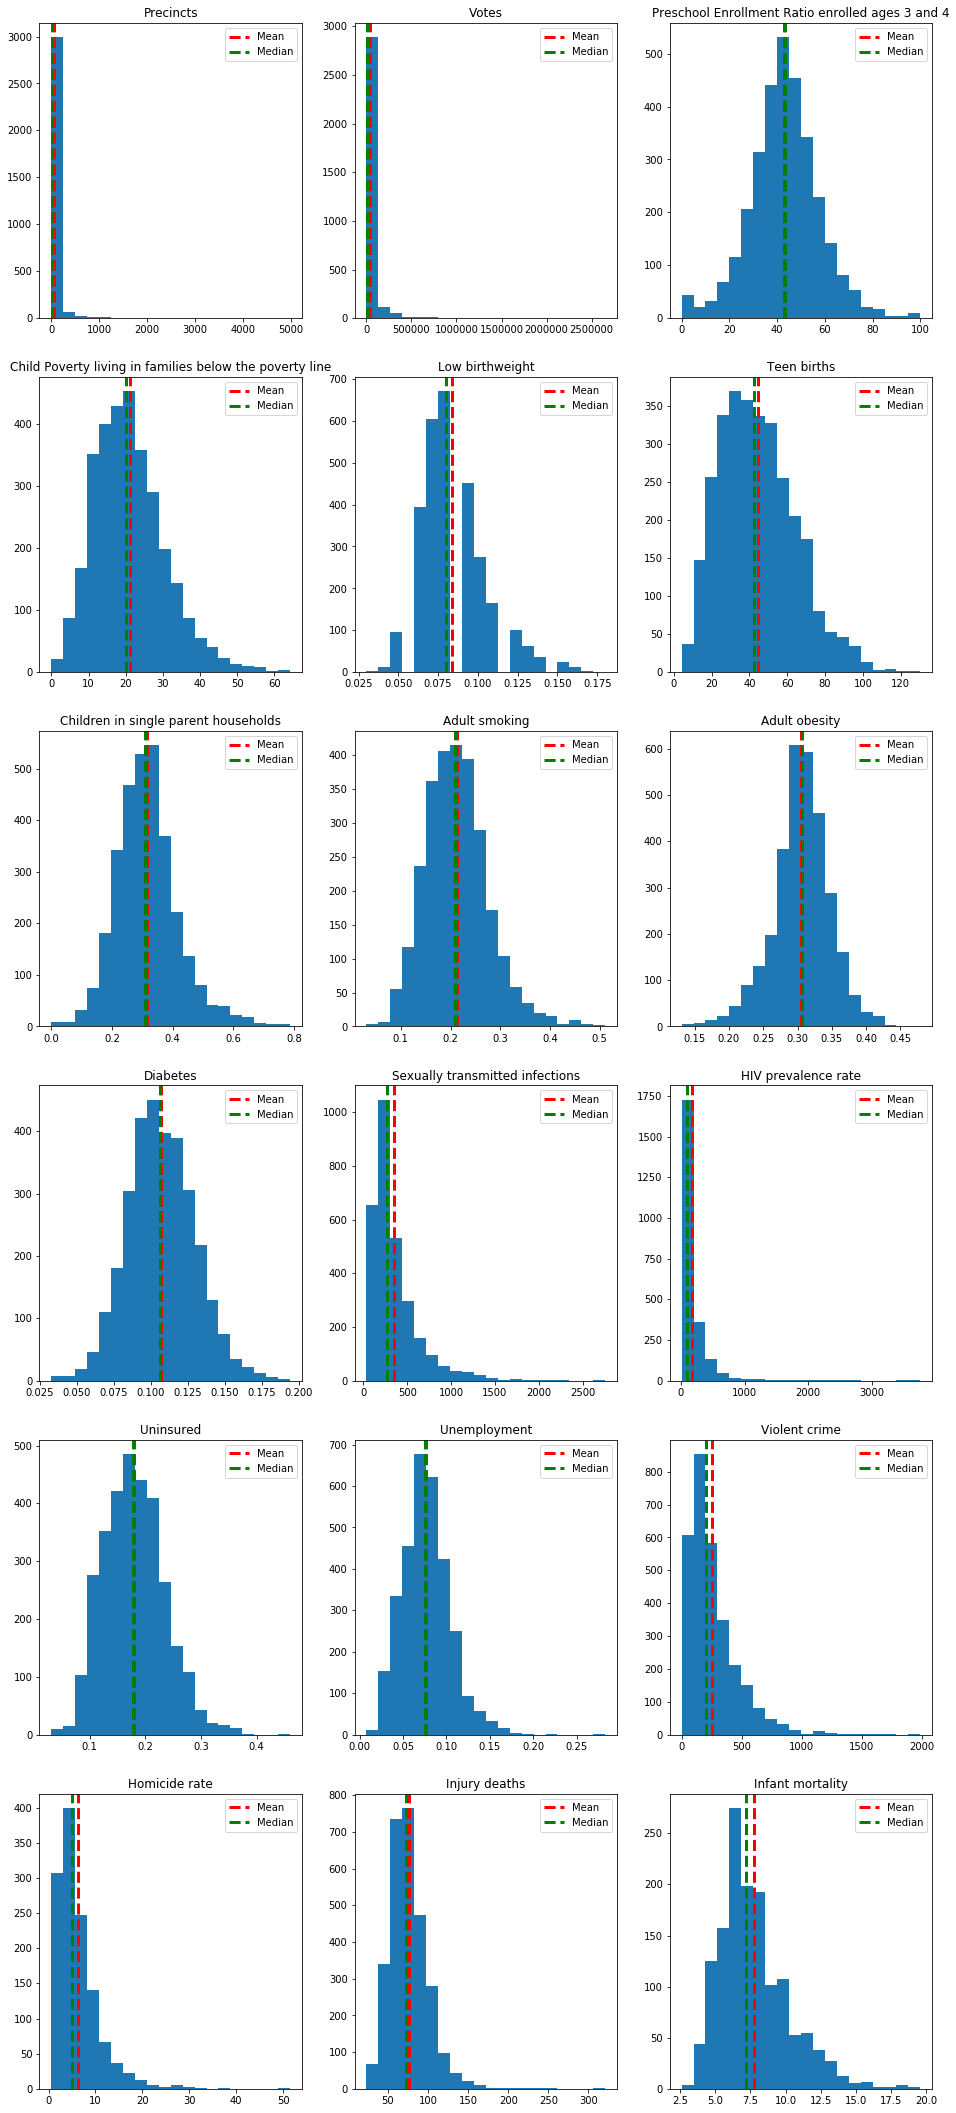

In [25]:
plt.figure(figsize=(16,30))
for i in range(len(NaN_columns)):

    plt.subplot(6, 3, i+1)
    plt.hist(Data_rev1[(NaN_columns[i])], bins=20)
    plt.axvline(Data_rev1[(NaN_columns[i])].mean(), color='r',label='Mean', linestyle='dashed', linewidth=3)
    plt.axvline(Data_rev1[(NaN_columns[i])].median(), color='g',label='Median', linestyle='dashed', linewidth=3)
    plt.title(str((NaN_columns[i])))
    plt.legend()
plt.show()


 #####     3.6. Correcting columns and rows with missing data

Since some predictive models are restrictive to missing values it is important to replacing missing values with a result. the best approach to take depends on the type of data and the data distribution patterns. For instance, datasets with a normal distribution can use either the mean or median as replacement for missing values, while datasets skewed either to the left or right would be better filled with a mean. 

An alternative to fill these mssing data cells would be to create a model, through a linear or polinomial regression. In order to do so, the first step would be  to evaluate the relationship between pairs of variables (Scatter plots) and the correlation between those pairs.

To evaluate the possibility of creating models, we prepared scatter plots comparing each of the missing data columns with all the other columns (with and without missing values).

**Coding:** 
1. First we created a new list, only with the missing data columns (odd_data).
2. Second, we created a nested for loops, the first one calls only the missing data columns(odd_data) and iterates with the complete data set.
3. Third, the output is a grid of scatter plot graphs between those iterations. 

**Results:**
- There is no clear relationship between the variables on **Data_rev1**.
- To make sure, we decided to run a correlation matrix.

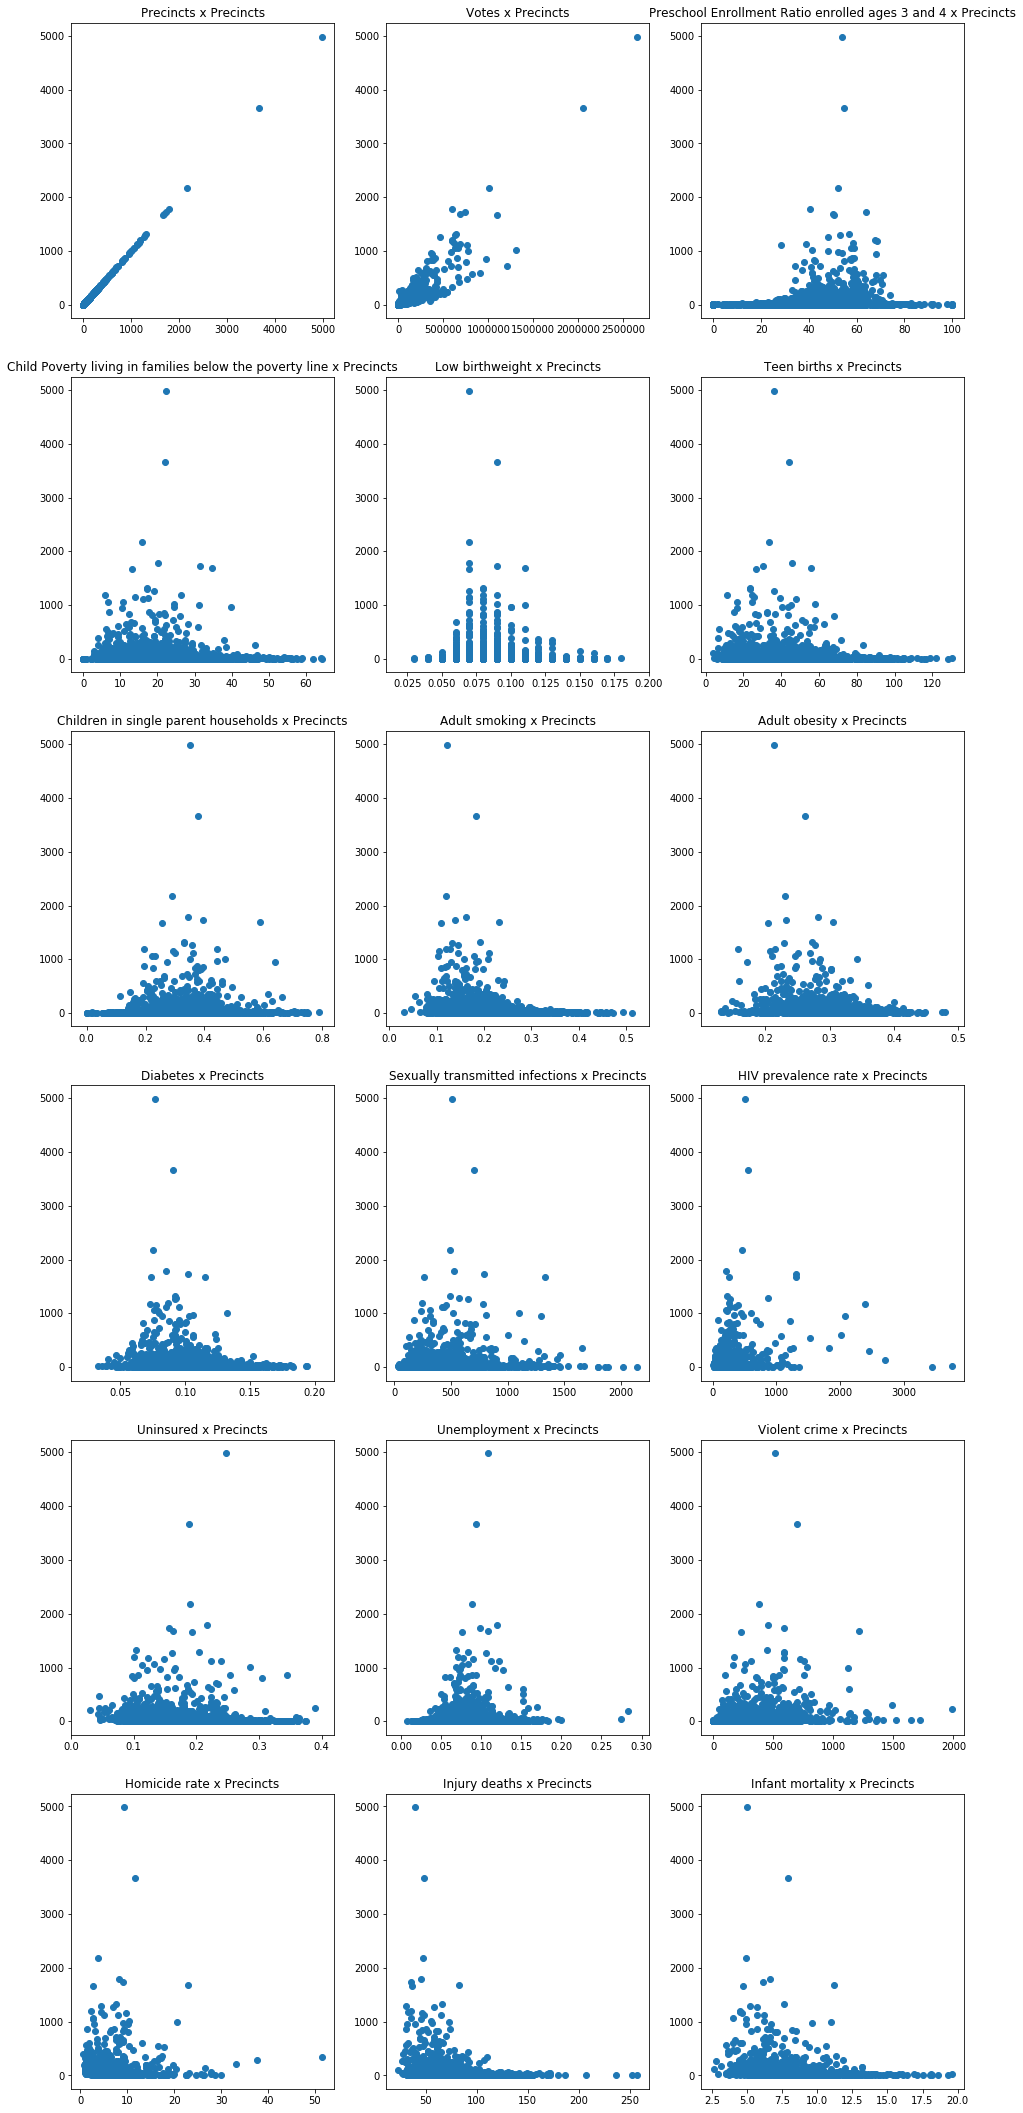

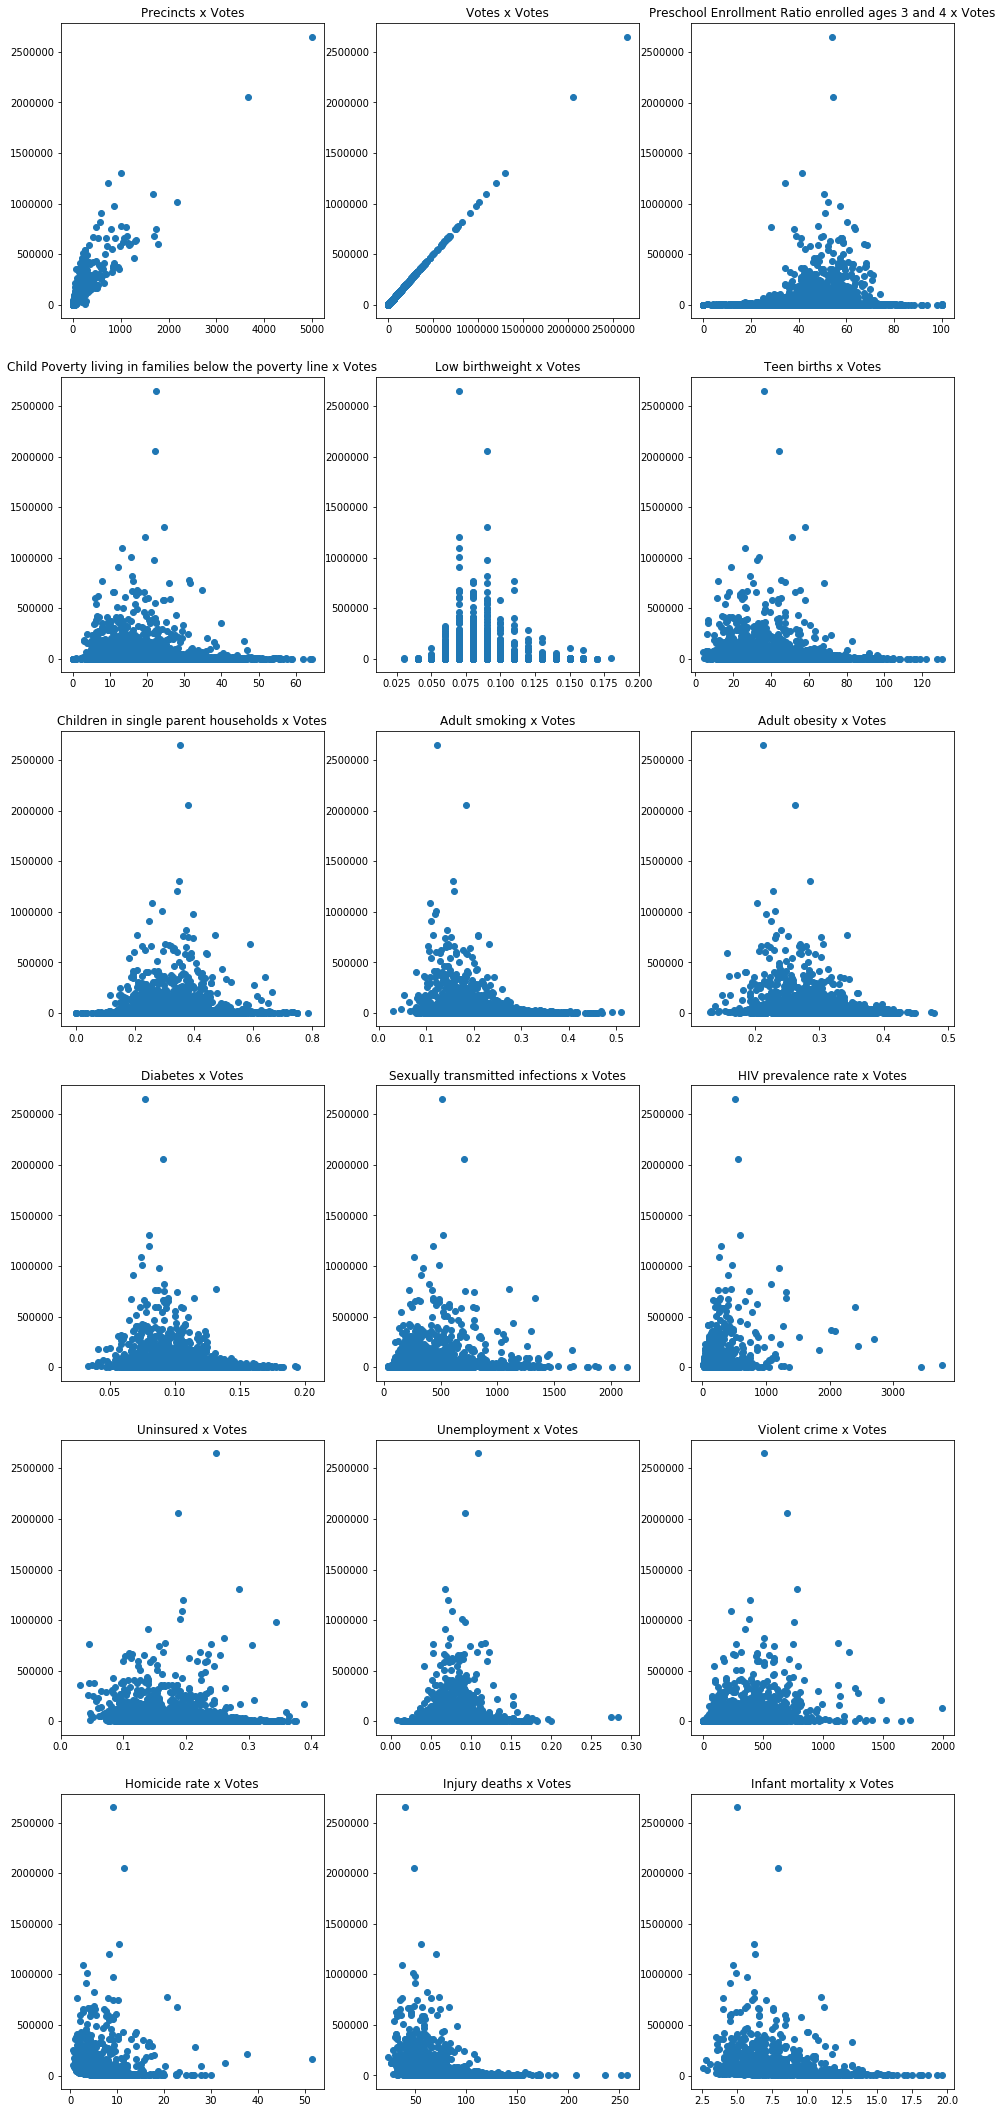

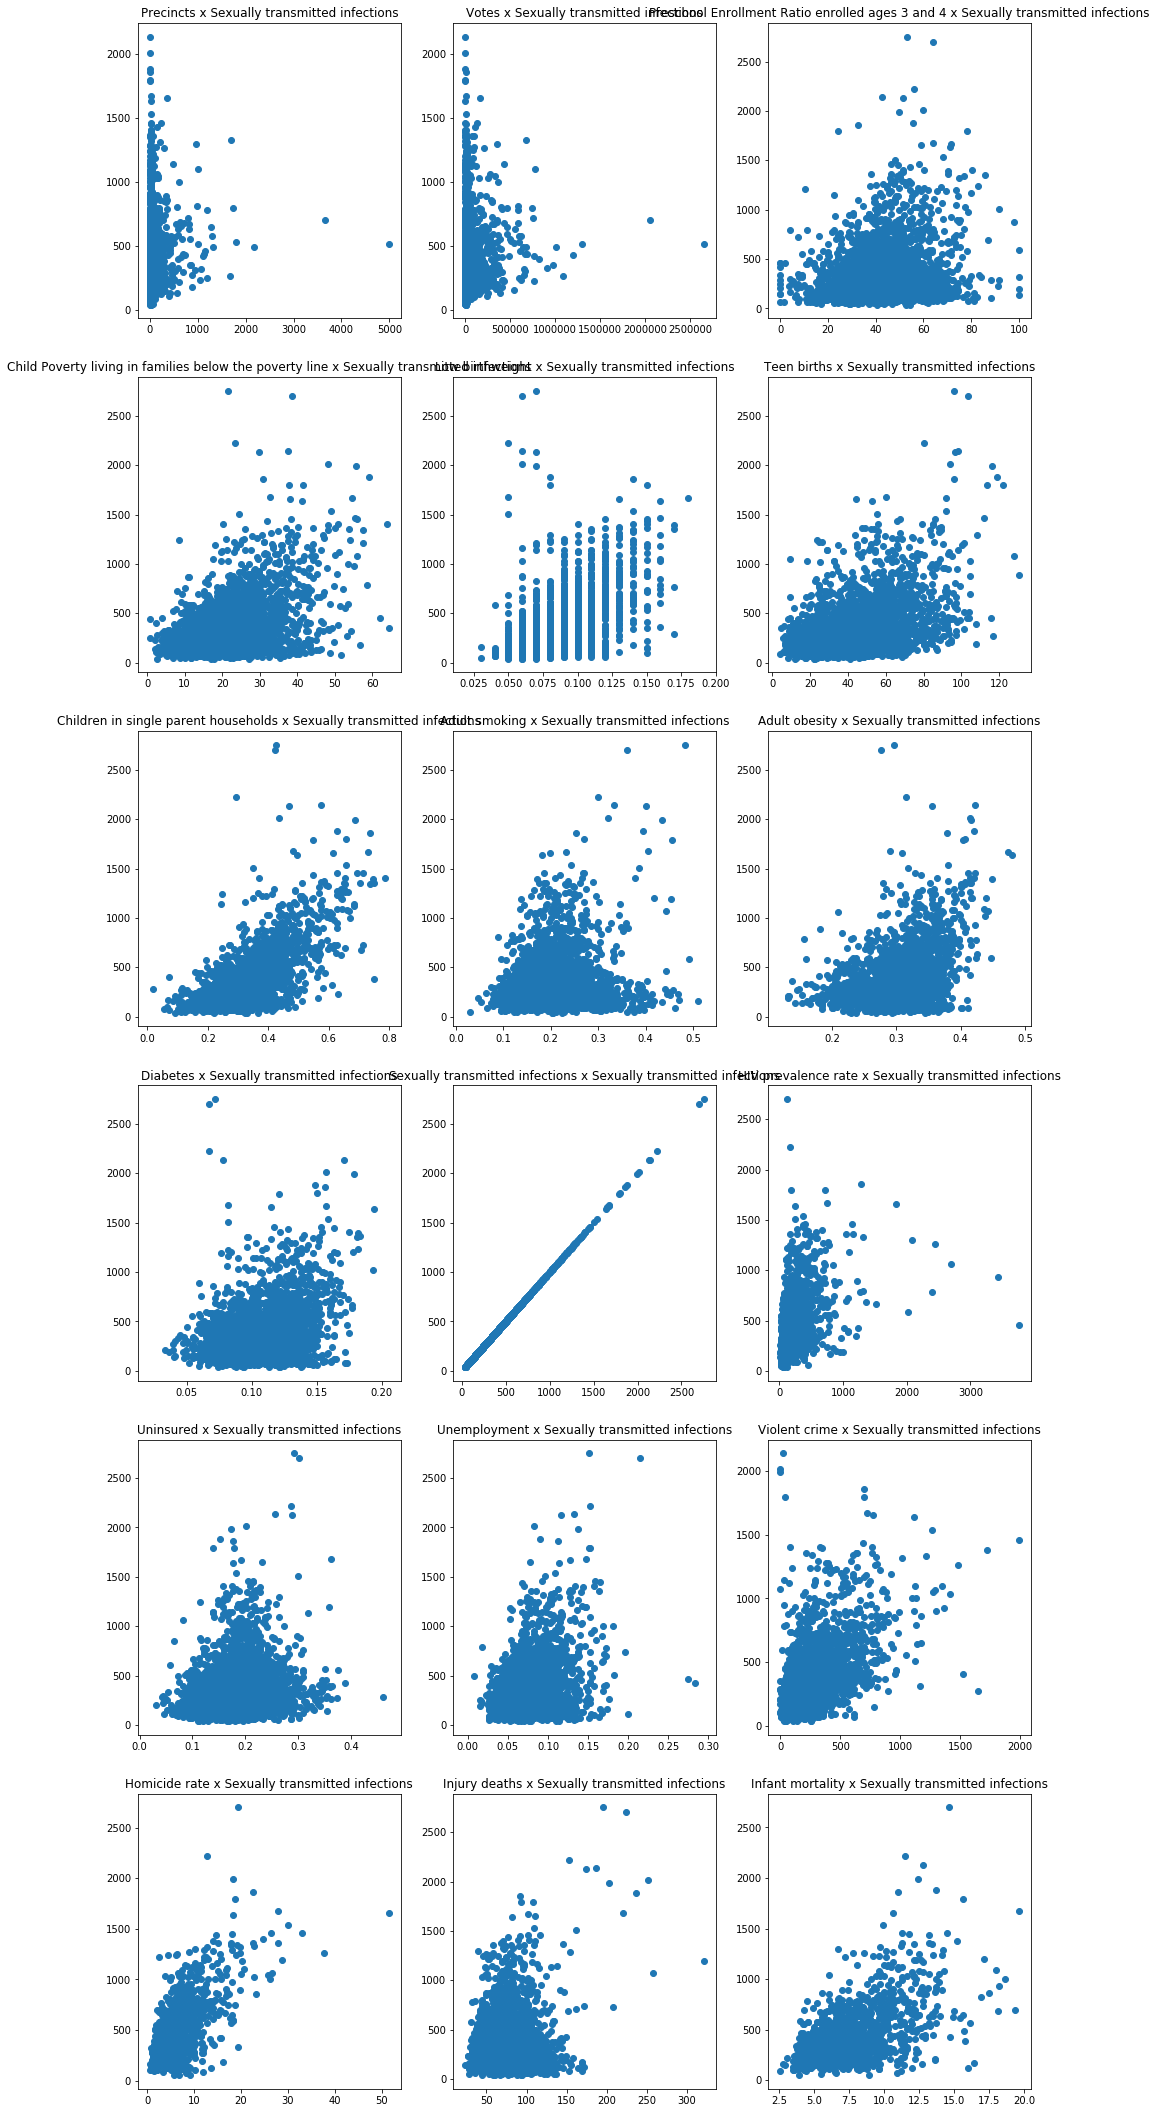

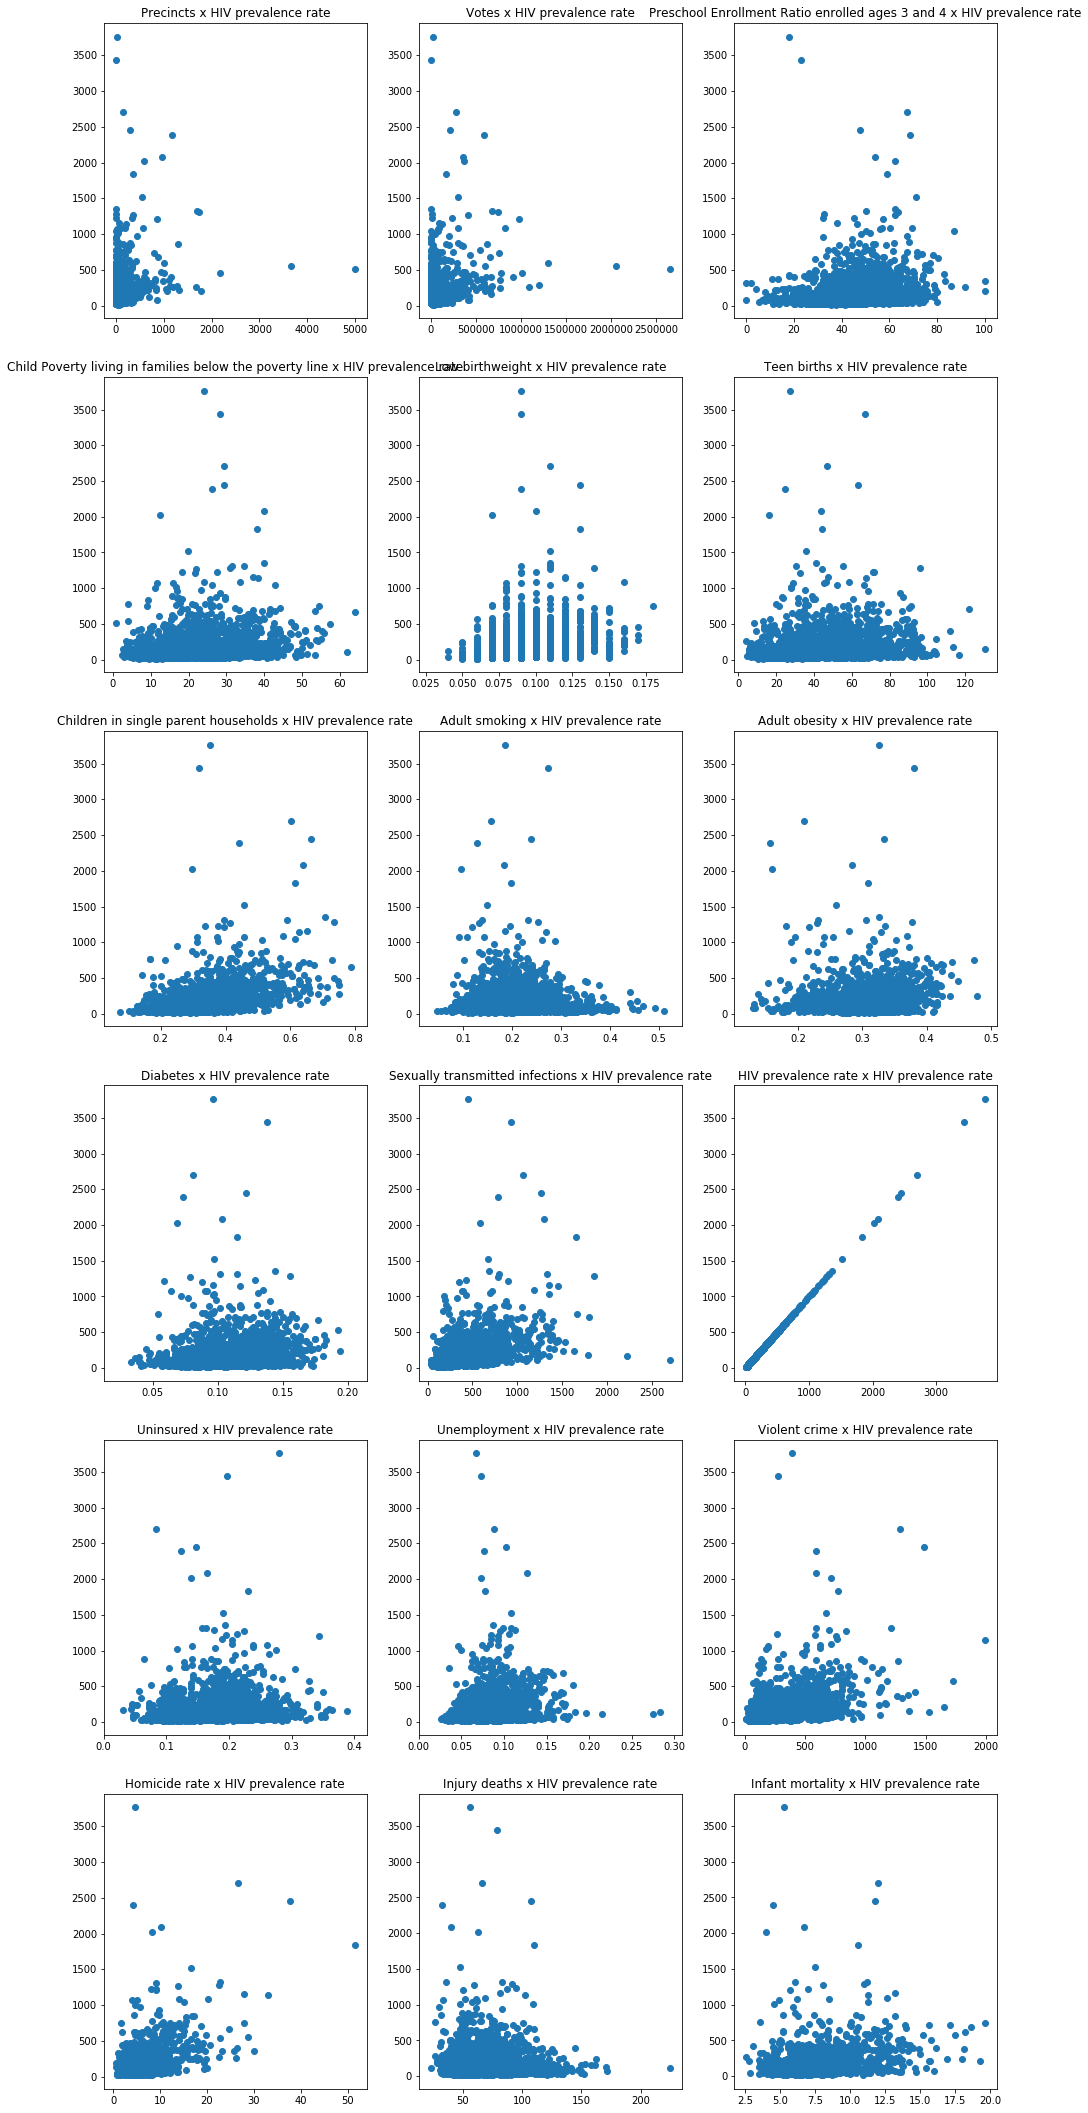

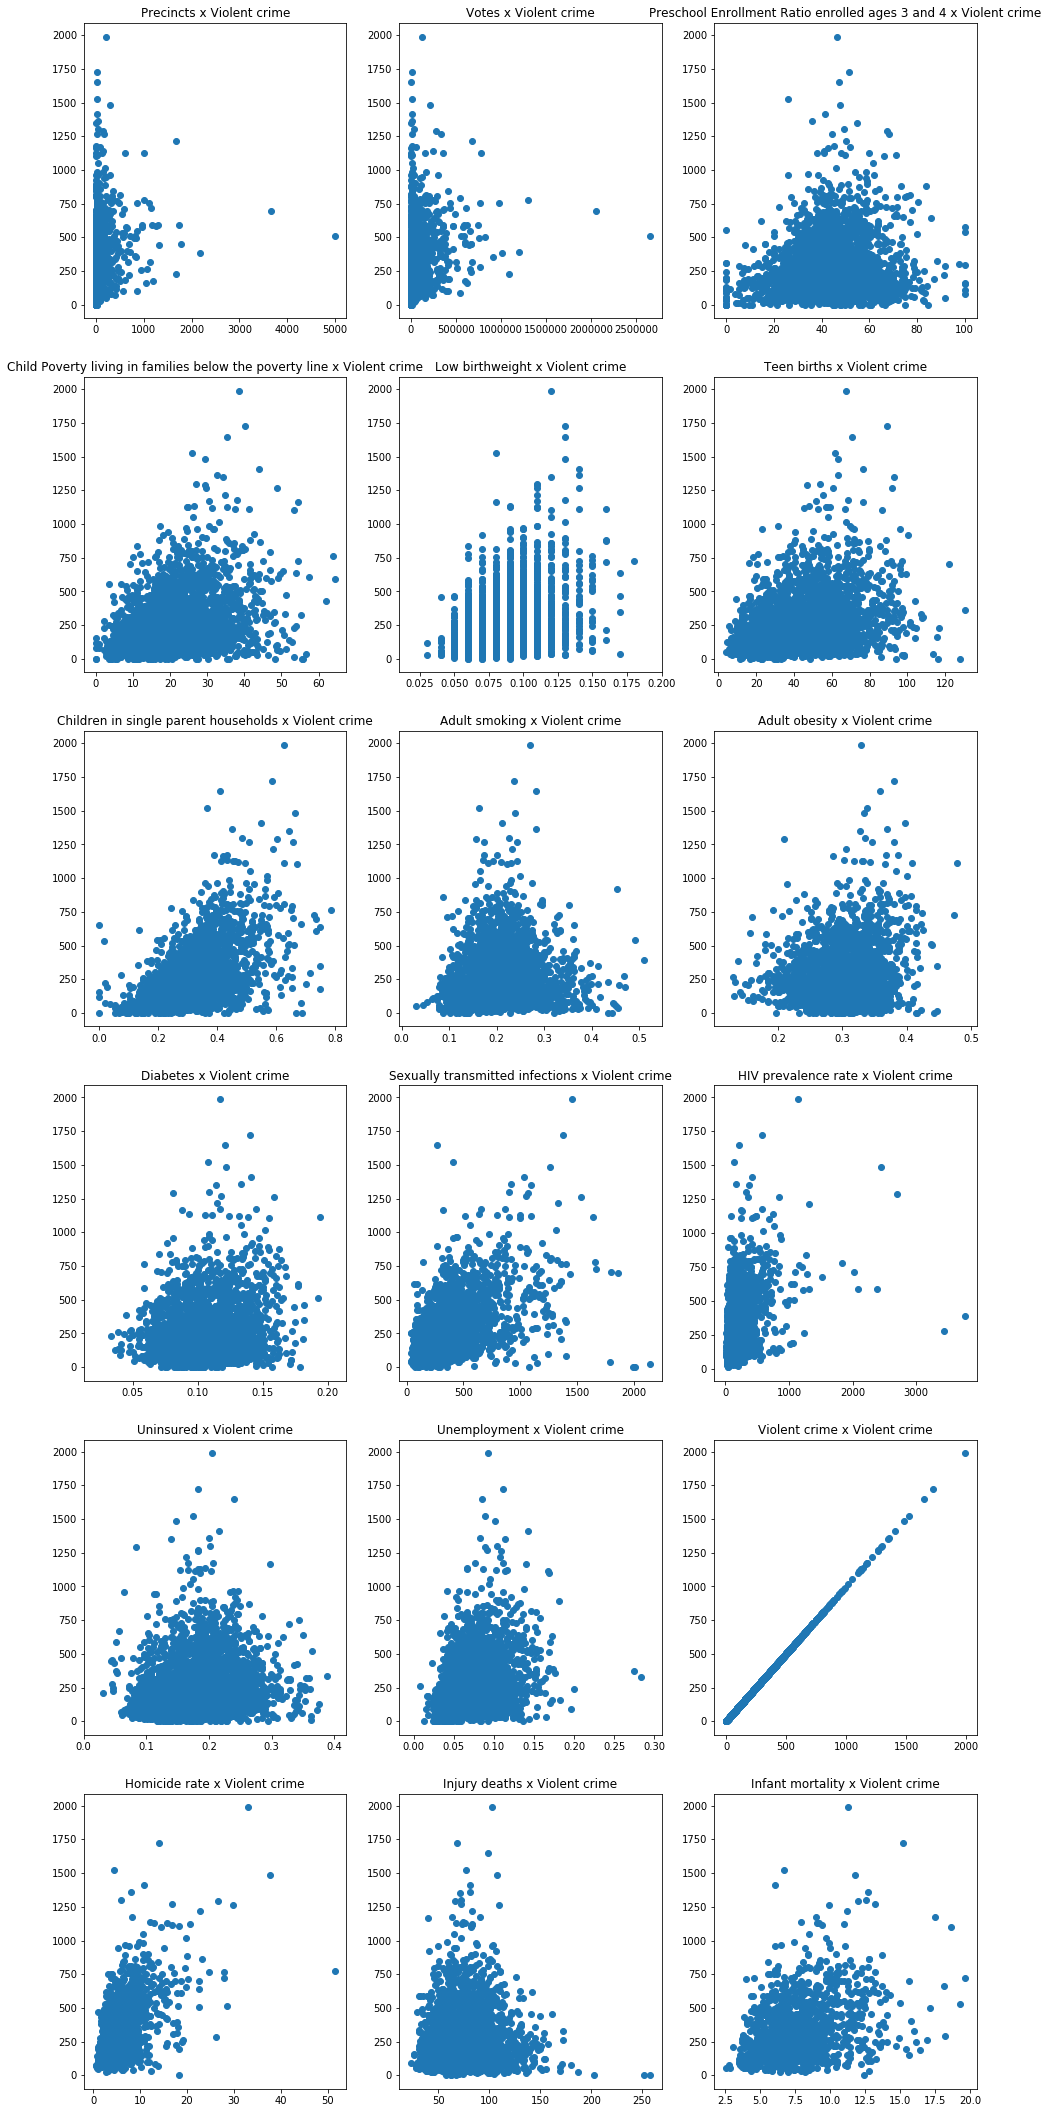

In [26]:
odd_data=list( NaN_columns[i] for i in [0, 1, 10, 11, 14] )
    
for i in odd_data:
    plt.figure(figsize=(16,28))
    for b in NaN_columns:
        plt.subplot(6, 3, NaN_columns.index(b)+1)
        plt.scatter(Data_rev1[b],Data_rev1[i])
        plt.title(b+" x "+i)
    plt.show()

To try and see possible correlations between the different columns, we prepared a correlation heatmap. 

**Coding:**
1. Define a size for the graph
2. Used a heatmap to plot the correlations in a matrix.
3. Included the lables and title.
4. Ploted the graph

**Results:**
- The correlation heatmap did not produce any robust result.


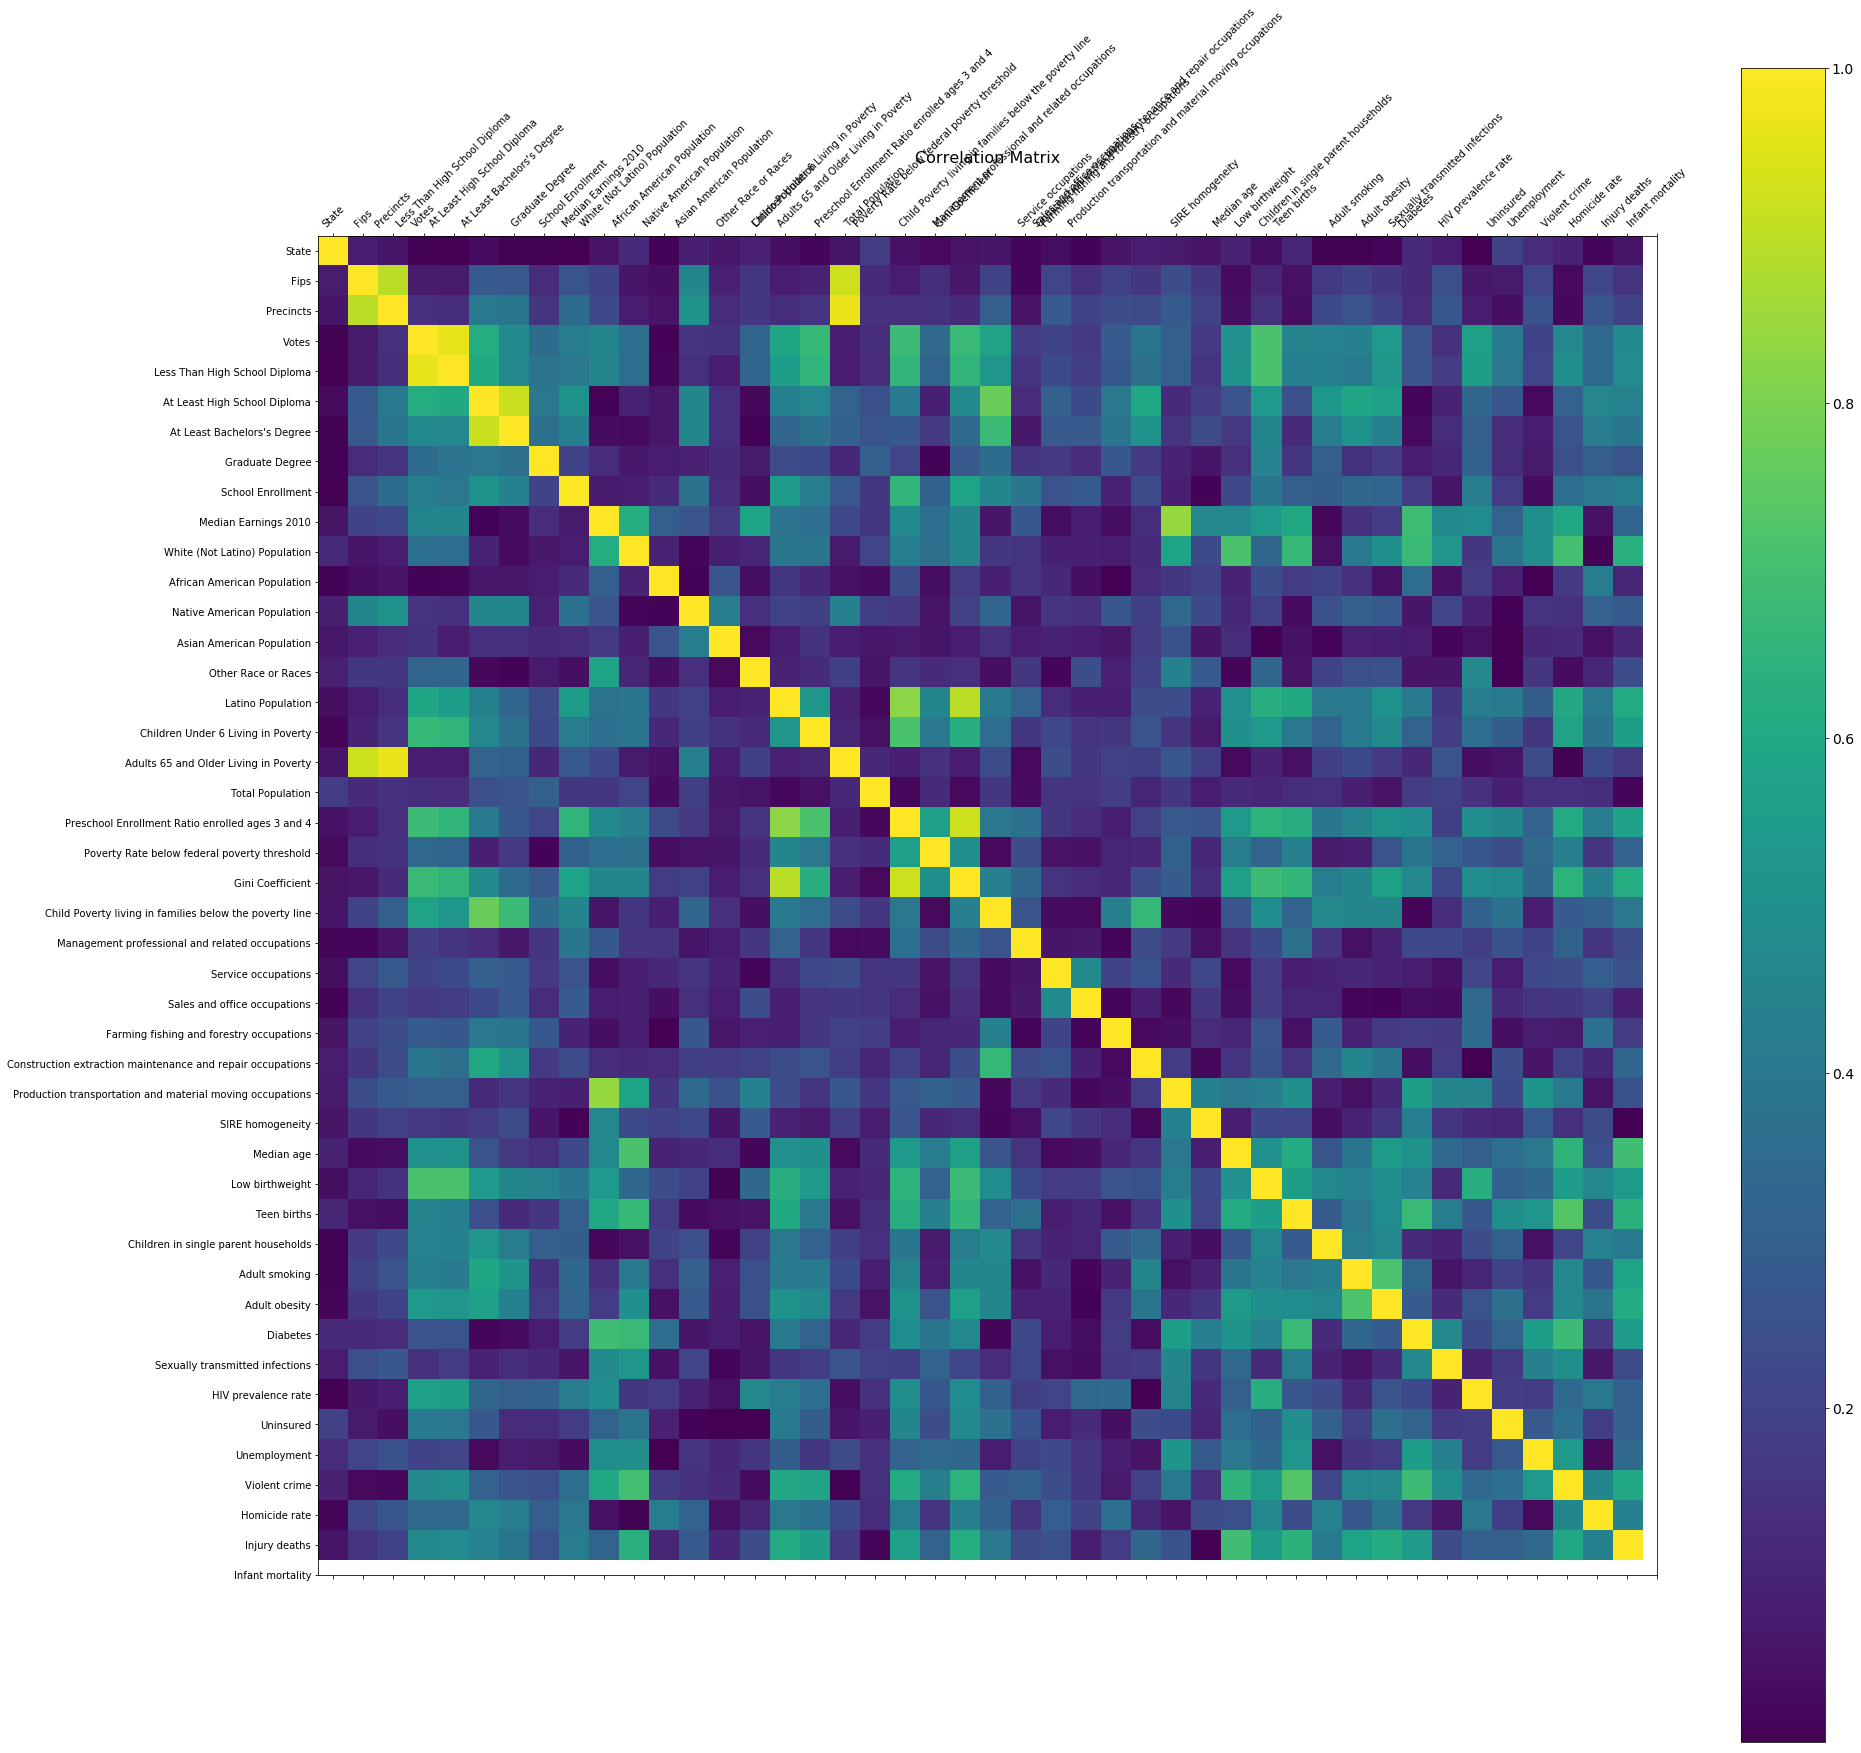

In [27]:
f = plt.figure(figsize=(30, 30))
plt.matshow(np.abs(Data_rev1.corr()), fignum=f.number)
plt.xticks(range(Data_rev1.shape[1]), Data_rev1.columns, fontsize=10, rotation=45)
plt.yticks(range(Data_rev1.shape[1]), Data_rev1.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

**Conclusion and Decisions:**

- Since the other analysis did not produce any alternative solution to replace the missing values, we decided to used the median.
- Therefore, we replaced the missing values in **Data_rev1** using the median as it was the best approach for the skewed data columns and, for the columns with a normal distribution, also had a very close result compared to the mean.
- The final dataframe was named **Data_rev2**

In [28]:
Data_rev2= Data_rev1
# mark zero values as missing or NaN
Data_rev2[list(NaN_columns)].replace(0, np.NaN)
# fill missing values with median column values
Data_rev2.fillna(Data_rev2.median(), inplace=True)
# count the number of NaN values in each column
print(Data_rev2.isnull().sum())

State                                                         0
Fips                                                          0
Precincts                                                     0
Votes                                                         0
Less Than High School Diploma                                 0
At Least High School Diploma                                  0
At Least Bachelors's Degree                                   0
Graduate Degree                                               0
School Enrollment                                             0
Median Earnings 2010                                          0
White (Not Latino) Population                                 0
African American Population                                   0
Native American Population                                    0
Asian American Population                                     0
Other Race or Races                                           0
Latino Population                       

##### 3.5.2. calculations for the votes_df*

*Data_rev1(data_df) calculations are shown on 3.5.1(above)

For the sake of refreshing our memory, we are showing the descriptive statistics for votes_df once again.

**Results:**

- For the six first variables, a clear difference between mean and median can be noticed.
- The results indicate that the **mean** would not be a good choice to replace missing data, instead the **median** should be used.
- It would be interesting to check the correlation between different elections first, though. As it is known that most US counties are very conservative in their voting pattern. So, results from previous elections could indicate the most likely outcome for future elections.

In [29]:
votes_df.describe()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
count,3.110000e+03,3.110000e+03,3110.000000,3110.000000,3109.000000,3.109000e+03,3141.00000
mean,2.230430e+04,2.114973e+04,19207.669453,19532.321222,19634.384046,2.007697e+04,30406.52149
std,7.716378e+04,7.425758e+04,44878.636253,44795.765395,40459.435551,7.203087e+04,15156.09339
min,8.000000e+00,5.000000e+00,67.000000,54.000000,57.000000,4.000000e+00,1001.00000
25%,1.811750e+03,1.556750e+03,2883.250000,2918.750000,3208.000000,1.166000e+03,18181.00000
50%,4.505500e+03,3.999000e+03,6312.000000,6450.500000,7169.000000,3.155000e+03,29179.00000
75%,1.239000e+04,1.138100e+04,16025.750000,16315.250000,17446.000000,9.610000e+03,45083.00000
max,2.295853e+06,2.216903e+06,956425.000000,885333.000000,620285.000000,1.893770e+06,56045.00000


First of all, as it will be required for the next query, we created a list with the columns' name.

**Coding:** 
- We created a new list(votes_col) by using .columns on the original data set

In [30]:
votes_col=votes_df.columns
print(votes_col)

Index(['Democrats 08 (Votes)', 'Democrats 12 (Votes)',
       'Republicans 08 (Votes)', 'Republicans 12 (Votes)', 'votes16_trumpd',
       'votes16_clintonh', 'Fips'],
      dtype='object')


With the newly created list, we proceeded and created histograms for each of the columns.

**Coding:**

- First we defined the size of the figures, to avoid overlapping and make them easier to read.
- Second, we opted to show them in a grid.
- Third, we defined the plot type as a histogram.
- Finally, we created dashed lines to represent mean and median and give and indication of how far or close they were from each other. 


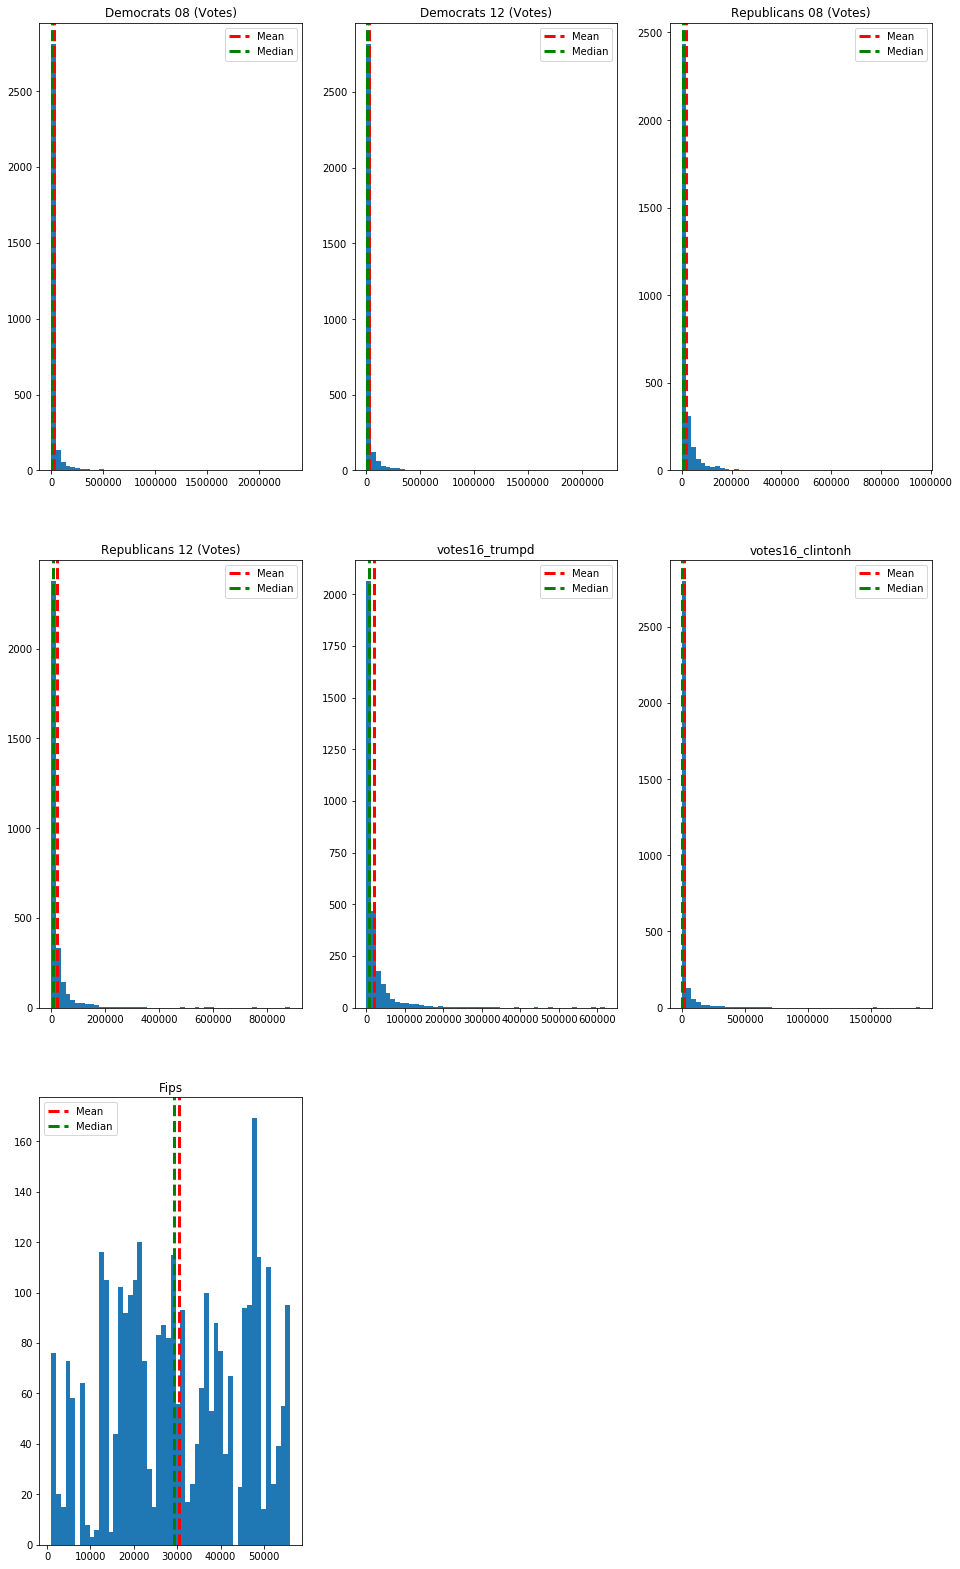

In [31]:
plt.figure(figsize=(16,28))
for i in range(len(votes_col)):

    plt.subplot(3, 3, i+1)
    plt.hist(votes_df[(votes_col[i])], bins=50)
    plt.axvline(votes_df[(votes_col[i])].mean(), color='r',label='Mean', linestyle='dashed', linewidth=3)
    plt.axvline(votes_df[(votes_col[i])].median(), color='g',label='Median', linestyle='dashed', linewidth=3)
    plt.title(str((votes_col[i])))
    plt.legend()
plt.show()




To try and see possible correlations between the different columns, we prepared a correlation heatmap. 

**Coding:**

- Created a new dataset, to exclude the FIPS from the correlation analysis as they would compromise visualization due to poor correlation.
- Defined a size for the graph
- Used a heatmap to plot the correlations in a matrix.
- Included the lables and title.
- Ploted the graph

**Results:**

- There are clear and strong correlations as shown by the heatmap.
- In general, they indicate that most likely the number of votes per county(FIPS) will follow the results from previous elections with small variations. 


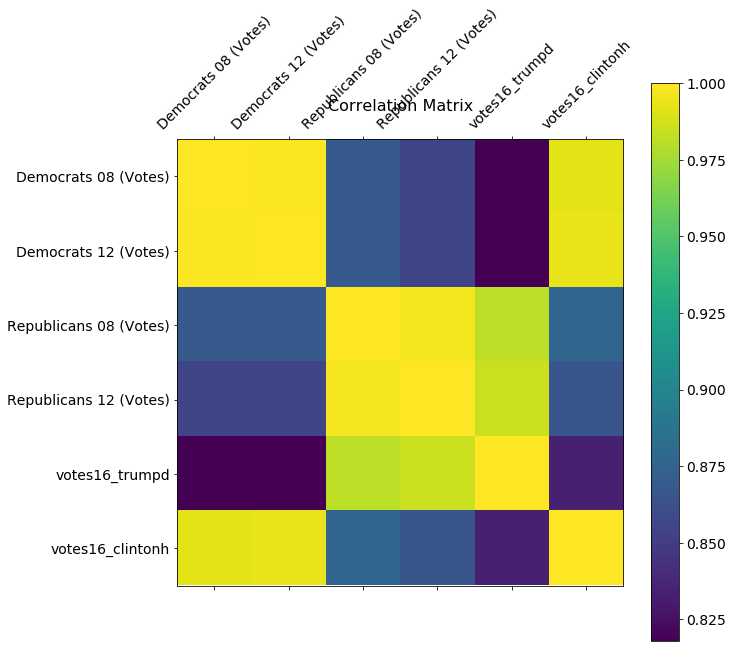

In [32]:
votes_only = votes_df.drop(columns=['Fips'])
f = plt.figure(figsize=(10, 10))
plt.matshow(np.abs(votes_only.corr()), fignum=f.number)
plt.xticks(range(votes_only.shape[1]), votes_only.columns, fontsize=14, rotation=45)
plt.yticks(range(votes_only.shape[1]), votes_only.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [33]:
votes_only.head()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0
3,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0
4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0


Slicing the rows with missing values, we may see that, in general, those counties with missing values in one election, had missing values in all previous elections. Therefore, even if we create a model using linear or polynomial regression, it won't be useful as the x values (results from previous elections) will be missing and no prediction would be made.

For this reason, there are three possible alternatives to replace the missing values with:

- Mean;
- Median;
- Don't replace, but exclude those rows.

There are 32 rows with missing values, out of the 3141 rows of data, representing more or less 1% of the data and that votes are dependant of the populations. As some predictive models require large amounts of data to increase their accuracy, it is important to fill empty cell with calculated values.

For the sake of future analysis, we will fill the missing cells. Based on our results from the votes_df.describe() and the histograms, it is more appropriate to use the **median**.

In [34]:
votes_df.isna()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


**Additional step:**

- Although not required, in the next five steps we merge and show a new votes_df dataframe, now having the number of votes on the latest election to help understand the data, called **votes_pop2**.


In [35]:
merge_votes_data = pd.merge(Data_rev2, votes_df, on='Fips')

In [36]:
merge_votes_data.head()

,State,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,...,Violent crime,Homicide rate,Injury deaths,Infant mortality,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh
0,Arkansas,5043,17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,...,449.02,5.08,82.0,7.2,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0
1,Arkansas,5087,20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,...,245.83,5.08,96.8,7.2,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0
2,Georgia,13159,3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,...,205.60,5.08,71.6,7.2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0
3,Colorado,8037,30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,...,123.88,5.08,42.9,3.5,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0
4,Georgia,13091,16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,...,477.48,8.11,79.4,7.2,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0


In [37]:
votes_pop = list(merge_votes_data.columns.values[4:45])

In [38]:
votes_pop2 = merge_votes_data.drop(columns=votes_pop)

In [39]:
votes_pop2.head()

,State,Fips,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh
0,Arkansas,5043,17.0,6590.0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0
1,Arkansas,5087,20.0,6829.0,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0
2,Georgia,13159,3.0,6016.0,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0
3,Colorado,8037,30.0,22611.0,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0
4,Georgia,13091,16.0,6995.0,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0


**Conclusion and decision:**

- Using the median of each column each missing value was replaced.
- The codes below implement the changes and finally print the result showing that no empty cell remains in our data set.


In [40]:
votes_pop3= votes_pop2
# mark zero values as missing or NaN
votes_pop3[list(votes_only)].replace(0, np.NaN)
# fill missing values with median column values
votes_pop3.fillna(votes_pop3.median(), inplace=True)
# count the number of NaN values in each column
print(votes_pop3.isnull().sum())

State                     0
Fips                      0
Precincts                 0
Votes                     0
Democrats 08 (Votes)      0
Democrats 12 (Votes)      0
Republicans 08 (Votes)    0
Republicans 12 (Votes)    0
votes16_trumpd            0
votes16_clintonh          0
dtype: int64


In [41]:
votes_pop3.head()

,State,Fips,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh
0,Arkansas,5043,17.0,6590.0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0
1,Arkansas,5087,20.0,6829.0,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0
2,Georgia,13159,3.0,6016.0,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0
3,Colorado,8037,30.0,22611.0,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0
4,Georgia,13091,16.0,6995.0,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0


## 4. Augmenting the data

##### 4.1. Creating new columns with relative count per county

As requested, relative count columns were created with the percentage representation of each party at each election.

**Coding:** For each of the newly created columns the same two following steps were taken:
1. Calculate the % value by Party_A/(Party A + Party B) * 100, rounding the result to leave only two decimal numbers.

2. Include the percentage sign by transforming column by column in a string and then adding the % sign.

**Results:**

- All six columns were calculated as requested, 3 for the Democrats and 3 for the Republicans, representing the results of each party-election, in %.

In [42]:
votes_pop3['votes_08_DEM_pct'] = round(votes_pop3['Democrats 08 (Votes)']/(votes_pop3['Democrats 08 (Votes)']+votes_pop3['Republicans 08 (Votes)'])*100,2)
votes_pop3['votes_08_DEM_pct'] = votes_pop3['votes_08_DEM_pct'].astype(str) + '%'

In [43]:
votes_pop3['votes_12_DEM_pct'] = round(votes_pop3['Democrats 12 (Votes)']/(votes_pop3['Democrats 12 (Votes)']+votes_pop3['Republicans 12 (Votes)'])*100,2)
votes_pop3['votes_12_DEM_pct'] = votes_pop3['votes_12_DEM_pct'].astype(str) + '%'

In [44]:
votes_pop3['votes_16_DEM_pct'] = round(votes_pop3['votes16_clintonh']/(votes_pop3['votes16_clintonh']+votes_pop3['votes16_trumpd'])*100,2)
votes_pop3['votes_16_DEM_pct'] = votes_pop3['votes_16_DEM_pct'].astype(str) + '%'

In [45]:
votes_pop3['votes_08_REP_pct'] = round(votes_pop3['Republicans 08 (Votes)']/(votes_pop3['Democrats 08 (Votes)']+votes_pop3['Republicans 08 (Votes)'])*100,2)
votes_pop3['votes_08_REP_pct'] = votes_pop3['votes_08_REP_pct'].astype(str) + '%'

In [46]:
votes_pop3['votes_12_REP_pct'] = round(votes_pop3['Republicans 12 (Votes)']/(votes_pop3['Democrats 12 (Votes)']+votes_pop3['Republicans 12 (Votes)'])*100,2)
votes_pop3['votes_12_REP_pct'] = votes_pop3['votes_12_REP_pct'].astype(str) + '%'

In [47]:
votes_pop3['votes_16_REP_pct'] = round(votes_pop3['votes16_trumpd']/(votes_pop3['votes16_clintonh']+votes_pop3['votes16_trumpd'])*100,2)
votes_pop3['votes_16_REP_pct'] = votes_pop3['votes_16_REP_pct'].astype(str) + '%'

In [48]:
votes_pop3.head()

,State,Fips,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,votes_08_DEM_pct,votes_12_DEM_pct,votes_16_DEM_pct,votes_08_REP_pct,votes_12_REP_pct,votes_16_REP_pct
0,Arkansas,5043,17.0,6590.0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,40.23%,40.36%,37.34%,59.77%,59.64%,62.66%
1,Arkansas,5087,20.0,6829.0,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,35.06%,32.99%,24.4%,64.94%,67.01%,75.6%
2,Georgia,13159,3.0,6016.0,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,33.07%,30.85%,26.18%,66.93%,69.15%,73.82%
3,Colorado,8037,30.0,22611.0,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,61.72%,57.61%,60.81%,38.28%,42.39%,39.19%
4,Georgia,13091,16.0,6995.0,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,31.89%,31.9%,26.78%,68.11%,68.1%,73.22%
